In [2]:
import matplotlib.pyplot as plt
import numpy as np
import vitaldb
import os
import time

In [62]:
while(True):    
    caseids = int(input("patient number: "))
    track_names = ['SNUADC/PLETH','SNUADC/ART']
    start_time = input("Start time? 00:00:00 - ")
    end_time = input("End time? 00:00:00 - ")
    start_point = (int(start_time[:2])*3600+int(start_time[2:4])*60+int(start_time[4:]))*125
    end_point = (int(end_time[:2])*3600+int(end_time[2:4])*60+int(end_time[4:]))*125

    #1번 환자의 Vital signal 모두 다운로드
    vals = vitaldb.load_case(caseids,['SNUADC/ART', 'SNUADC/PLETH'],1/125)[start_point:end_point]

    #바이너리 파일로 원본 저장
    down_folder2 = 'D:\\김윤철\\Dataset\\Ex_3\\Vitaldb_dataset\\'
    zero_str = "0000"
    zero_str = zero_str[:-len(str(caseids))]
    npz_filename2 = "Vitaldb_raw_data_p"+zero_str+str(caseids)+".npz"
    np.savez(down_folder2 + npz_filename2, x=vals[:, 1], y=vals[:, 0], z=[start_point, end_point])

patient number:  1302
Start time? 00:00:00 -  000000
End time? 00:00:00 -  040900


KeyboardInterrupt: Interrupted by user

Type raw data folder:  /home/yoonchul/Downloads
Type save folder:  /home/yoonchul/Downloads/Preprocessed


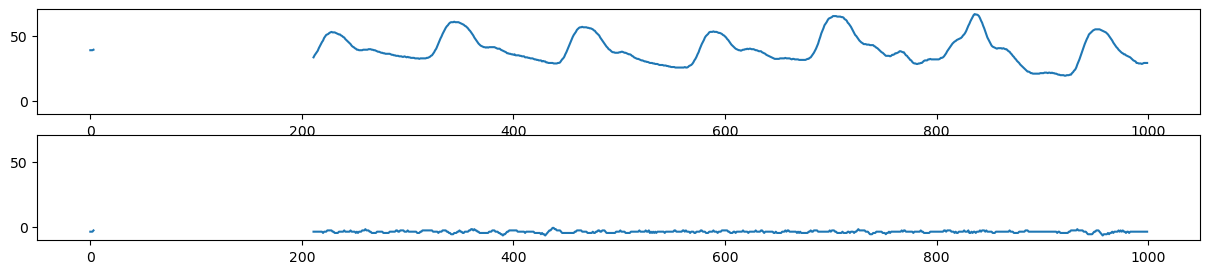

step forward or backward? little or no[1,2,3,4,5]:  5


start_curser: 7501


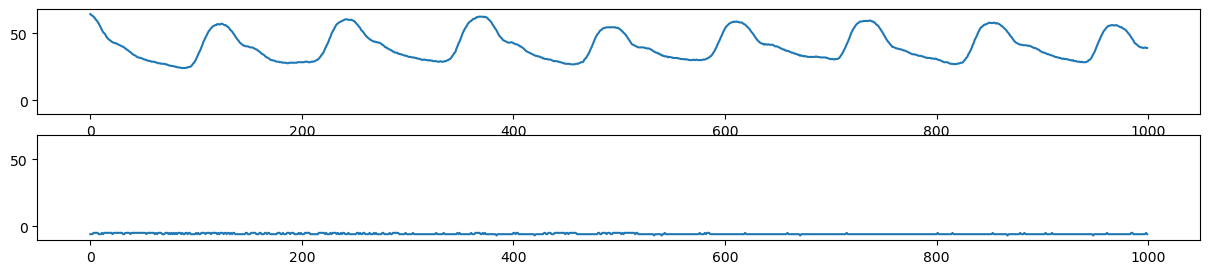

step forward or backward? little or no[1,2,3,4,5]:  5


start_curser: 15001


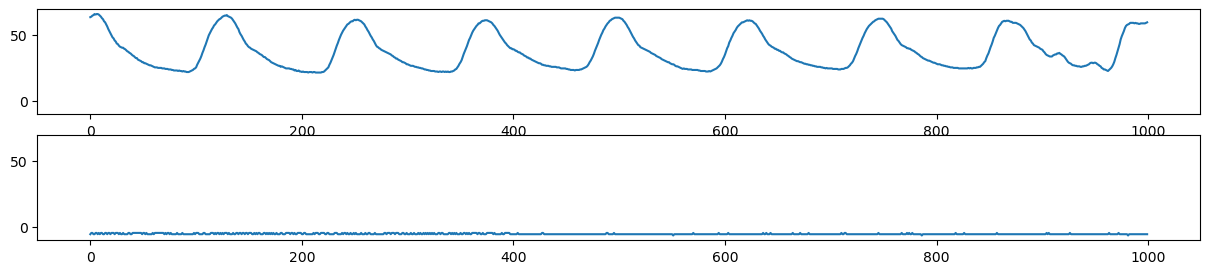

step forward or backward? little or no[1,2,3,4,5]:  5


start_curser: 22501


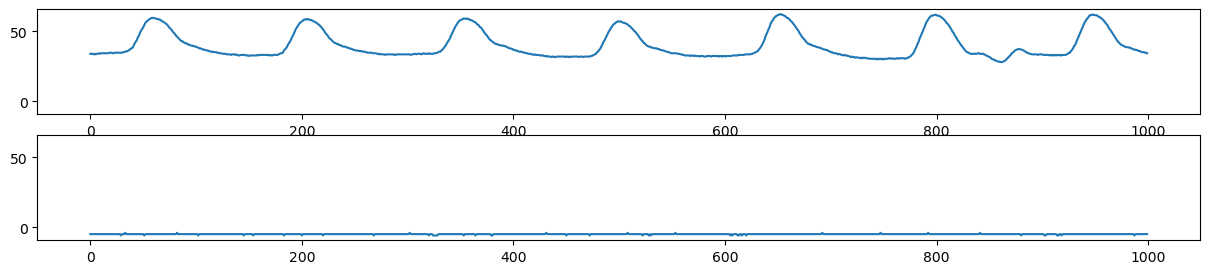

step forward or backward? little or no[1,2,3,4,5]:  5


start_curser: 30001


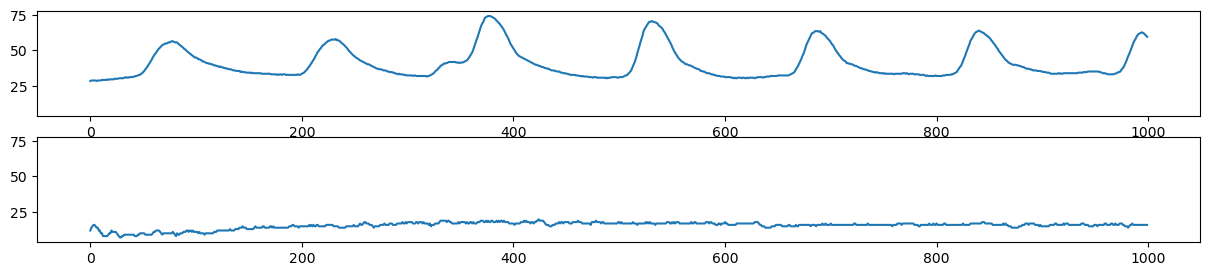

step forward or backward? little or no[1,2,3,4,5]:  5


start_curser: 37501


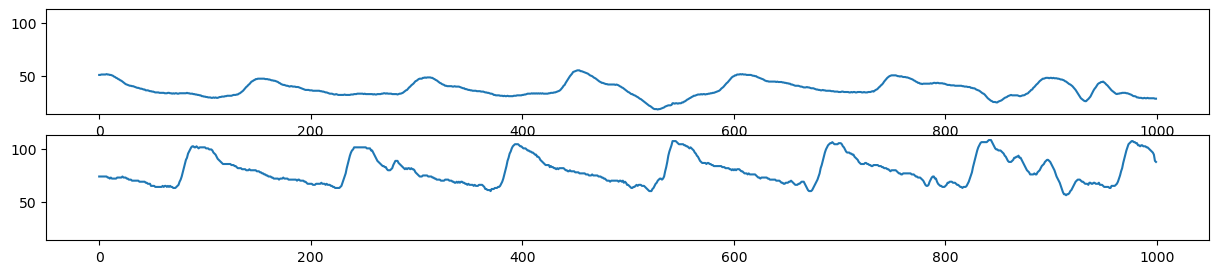

step forward or backward? little or no[1,2,3,4,5]:  4


start_curser: 38501


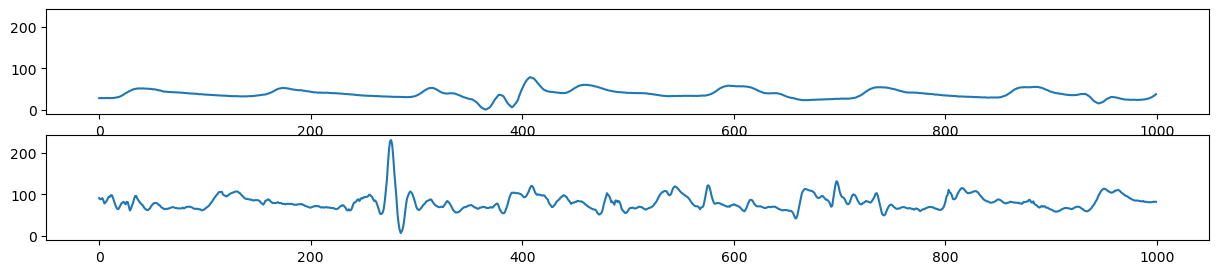

step forward or backward? little or no[1,2,3,4,5]:  4


start_curser: 39501


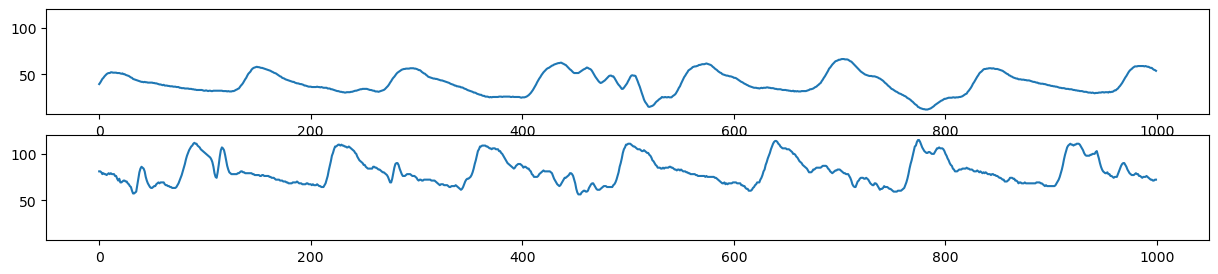

step forward or backward? little or no[1,2,3,4,5]:  4


start_curser: 40501


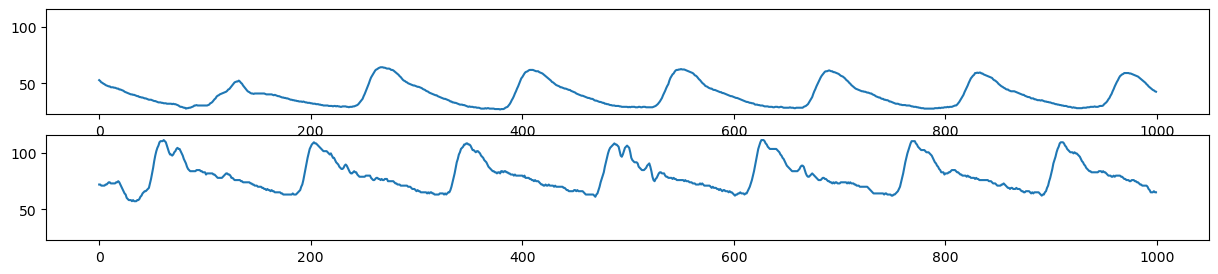

step forward or backward? little or no[1,2,3,4,5]:  4


start_curser: 41501


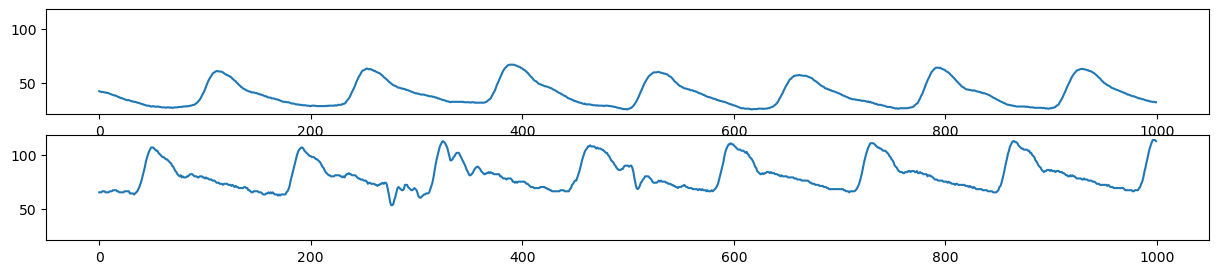

step forward or backward? little or no[1,2,3,4,5]:  3


start_curser: 41501


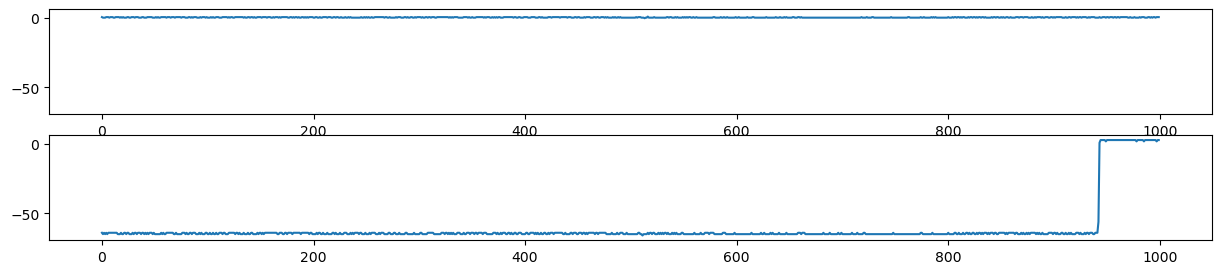

step forward or backward? little or no[1,2,3,4,5]:  0


end_curser: -75001


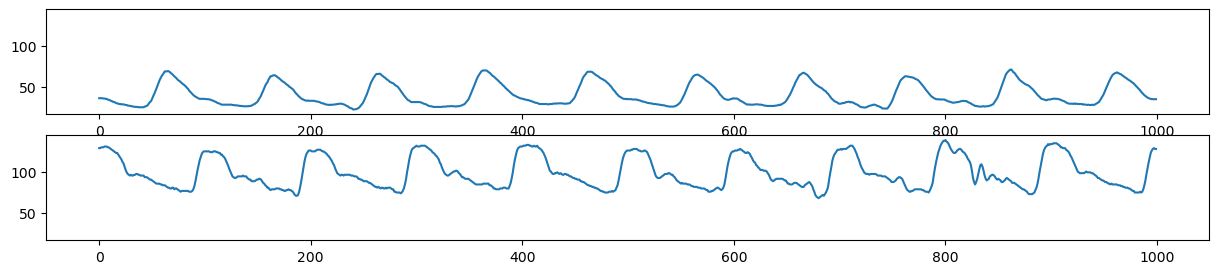

step forward or backward? little or no[1,2,3,4,5]:  4


end_curser: -74001


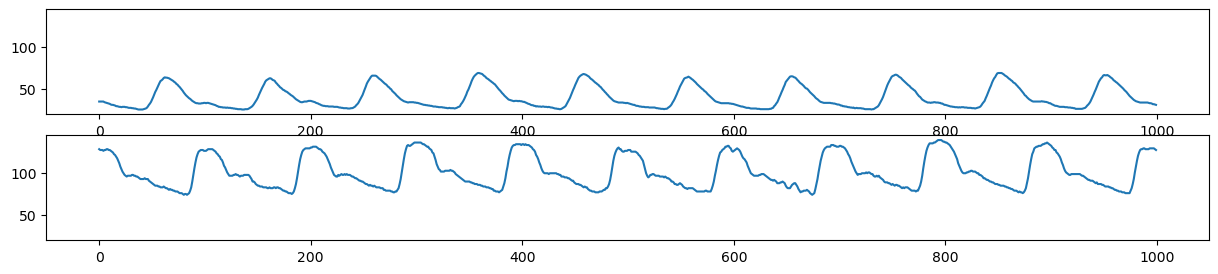

step forward or backward? little or no[1,2,3,4,5]:  4


end_curser: -73001


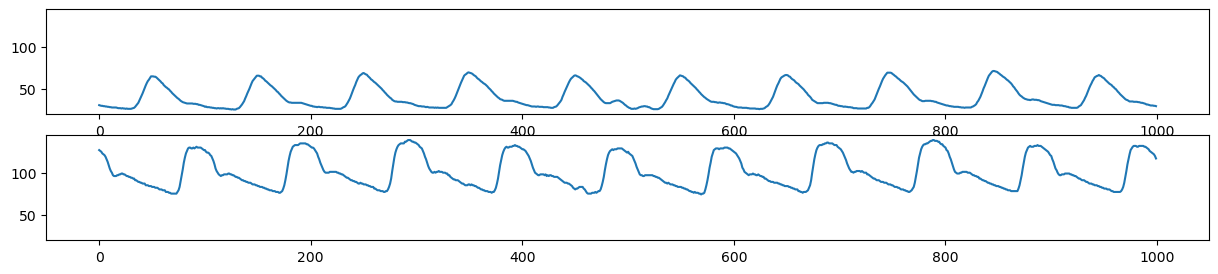

step forward or backward? little or no[1,2,3,4,5]:  4


end_curser: -72001


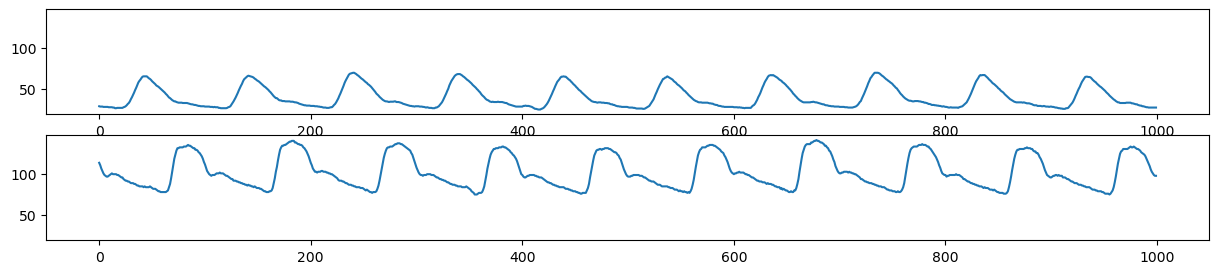

step forward or backward? little or no[1,2,3,4,5]:  4


end_curser: -71001


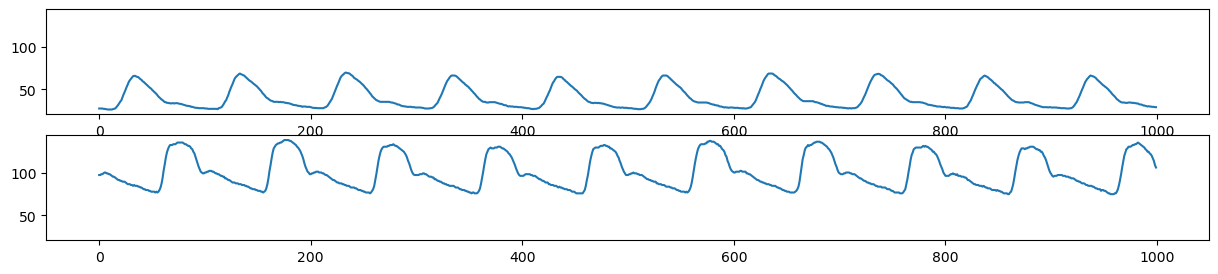

step forward or backward? little or no[1,2,3,4,5]:  4


end_curser: -70001


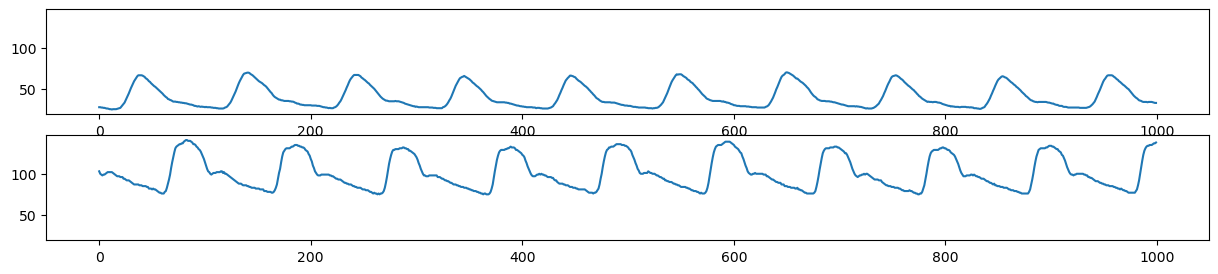

step forward or backward? little or no[1,2,3,4,5]:  5


end_curser: -62501


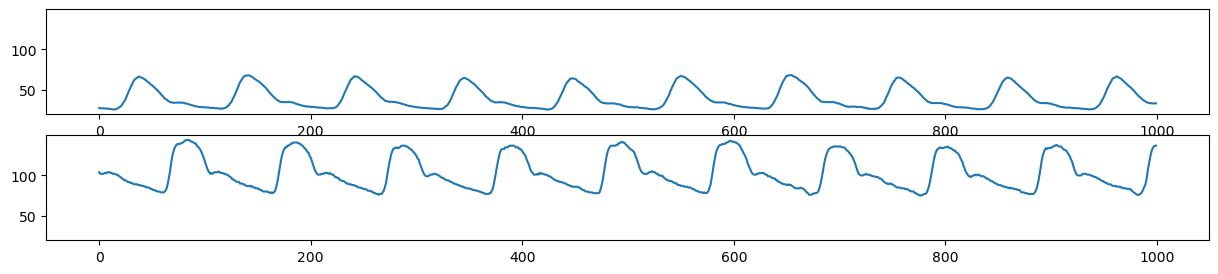

step forward or backward? little or no[1,2,3,4,5]:  5


end_curser: -55001


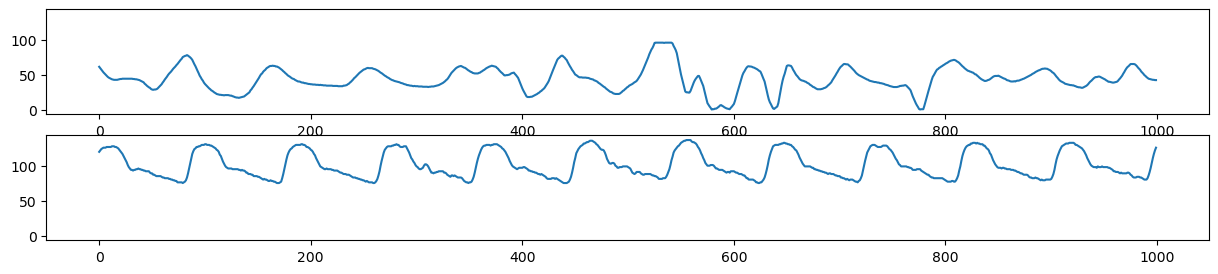

step forward or backward? little or no[1,2,3,4,5]:  2


end_curser: -56001


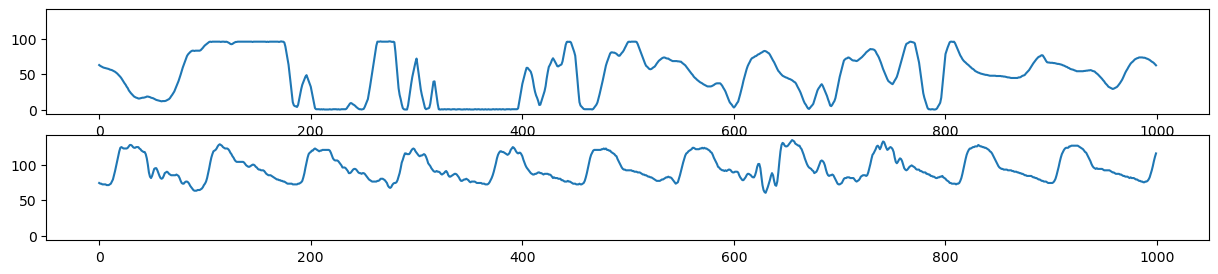

step forward or backward? little or no[1,2,3,4,5]:  2


end_curser: -57001


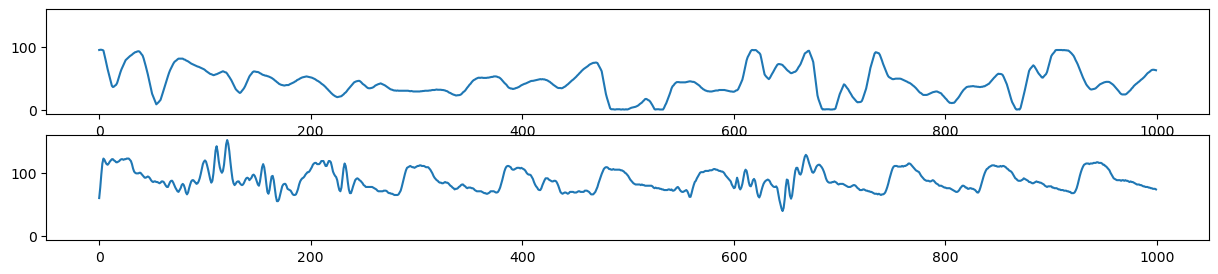

step forward or backward? little or no[1,2,3,4,5]:  2


end_curser: -58001


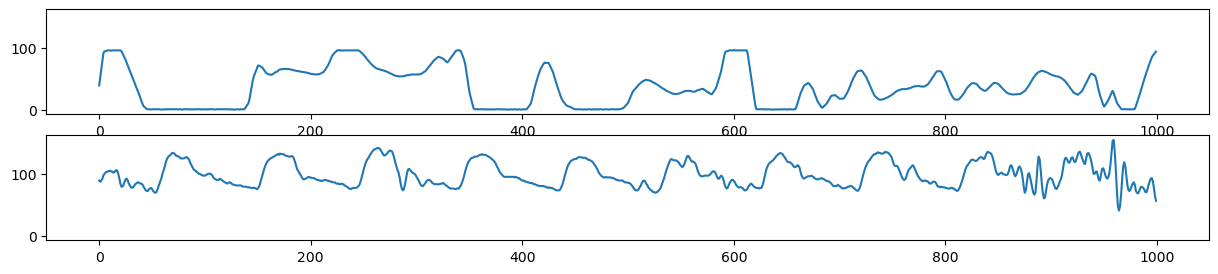

step forward or backward? little or no[1,2,3,4,5]:  2


end_curser: -59001


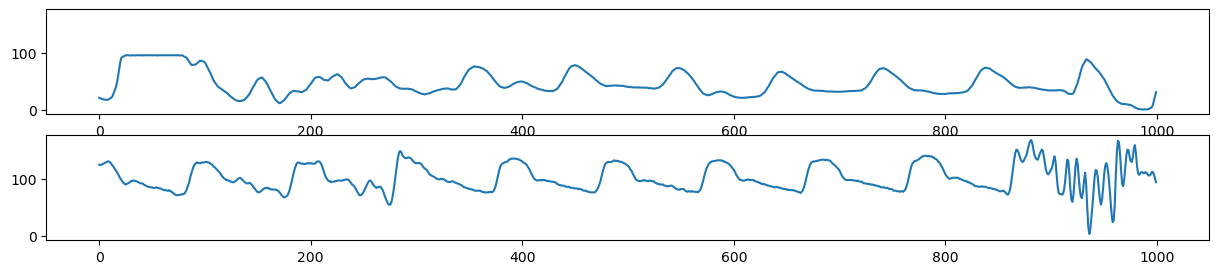

step forward or backward? little or no[1,2,3,4,5]:  2


end_curser: -60001


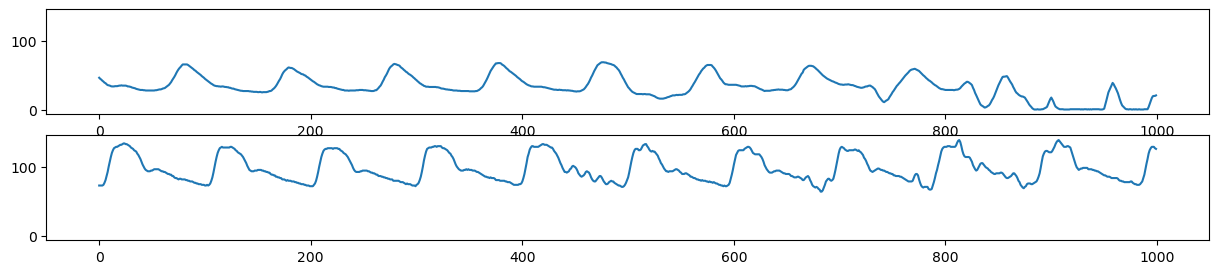

step forward or backward? little or no[1,2,3,4,5]:  2


end_curser: -61001


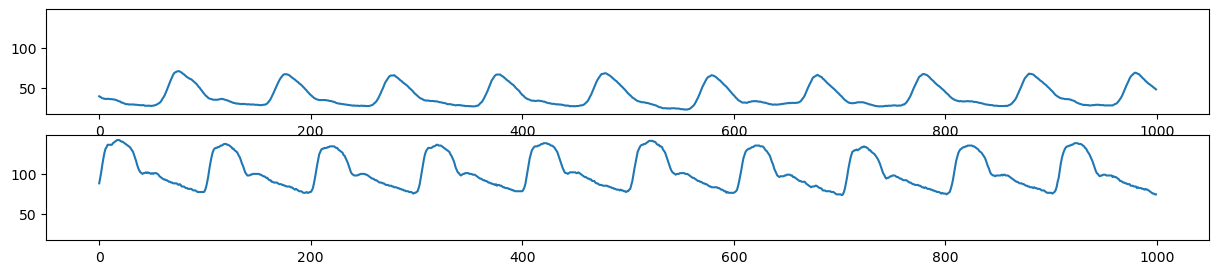

step forward or backward? little or no[1,2,3,4,5]:  3


end_curser: -61001


In [4]:
raw_data_dir = input("Type raw data folder: ")
save_folder = input("Type save folder: ")
file_list = os.listdir(raw_data_dir)
for file_name in file_list:
    if file_name.endswith('.npz'):
        flg = True
        flg_2 = True
        flg_3 = True
        start_curser = 1
        end_curser = -1
        data = np.load(raw_data_dir + "/" + file_name)
        plt.show()
        while(flg):
            while(flg_2):
                if start_curser > 0:
                    x_data_temp = data['x'][start_curser:start_curser+1000]
                    y_data_temp = data['y'][start_curser:start_curser+1000]
                    fig, ax = plt.subplots(2,1, sharey = True, figsize = (15,3))
                    ax[0].plot(x_data_temp)
                    ax[1].plot(y_data_temp)
                    plt.show()
                    
                    step = int(input("step forward or backward? little or no[1,2,3,4,5]: " ))
                    if step == 6:
                        start_curser += 75000
                    if step == 5:
                        start_curser += 7500
                    if step == 4:
                        start_curser += 1000
                    if step == 2:
                        start_curser -= 1000
                    if step == 1:
                        start_curser -= 7500
                    if step == 0:
                        start_curser -= 75000
                    if step == 3:
                        flg_2 = False
                        plt.close()
                    print("start_curser:", start_curser)

                elif start_curser <0:
                    print("end_curser overflowed. Reset to -1")
                    start_curser = 1
                    plt.close()

            while(flg_3):
                if end_curser < 0:
                    x_data_temp = data['x'][end_curser-1000:end_curser]
                    y_data_temp = data['y'][end_curser-1000:end_curser]
                    fig, ax = plt.subplots(2,1, sharey = True, figsize = (15,3))
                    ax[0].plot(x_data_temp)
                    ax[1].plot(y_data_temp)
                    plt.show()
                    
                    step = int(input("step forward or backward? little or no[1,2,3,4,5]: " ))
                    if step == 6:
                        end_curser += 75000
                    if step == 5:
                        end_curser += 7500
                    if step == 4:
                        end_curser += 1000
                    if step == 2:
                        end_curser -= 1000
                    if step == 1:
                        end_curser -= 7500
                    if step == 0:
                        end_curser -= 75000
                    if step == 3:
                        flg_3 = False
                        plt.close()

                    print("end_curser:", end_curser)
                elif end_curser > 0:
                    print("end_curser overflowed. Reset to -1")
                    end_curser = -1
                    plt.close()
            refined_data_x = data['x'][start_curser:end_curser]
            refined_data_y = data['y'][start_curser:end_curser]
            np.savez(save_folder+'/'+file_name, x = refined_data_x, y=refined_data_y)
            flg = False
            plt.close()


In [ ]:
Type raw data folder:  /home/yoonchul/Downloads
Type save folder:  /home/yoonchul/Downloads/Preprocessed

In [64]:
data.close()